# Algebra liniowa z zastosowaniami 1

## Ćwiczenia w sali komputerowej nr 4

Uzupełnij swoje dane i sprawdź, czy wyświetlają się poprawnie:

In [1]:
IMIE_NAZWISKO = "Daniel Stodulski"

print(IMIE_NAZWISKO)

Daniel Stodulski


Standardowo zaczniemy od wczytania biblioteki NumPy:

In [2]:
import numpy as np

Podczas rozwiązywania zadań nie wykorzystuj funkcji innych bibliotek, np. SciPy lub SymPy. O ile nie jest to podane wprost w treści zadania, nie korzystaj również z modułu `linalg` biblioteki NumPy.

### 1. Jak macierzy przyporządkować liczbę?

W czasie dotychczasowych zajęć widzieliśmy, w jaki sposób układy równań liniowych można wyrażać w formie równań macierzowych. Działania na macierzach (np. mnożenie macierzy) służyły znalezieniu rozwiązania układu równań (np. metodą eliminacji Gaussa). Celem niniejszych zajęć jest omówienie pojęcia wyznacznika oraz poznanie nowej metody rozwiązywania układów równań – metody wyznacznikowej.

Na samym początku zwróćmy uwagę, że wyznacznik odnosi się **wyłącznie do macierzy kwadratowej**. Intuicja stojąca za wyznacznikiem nie jest prosta do wyjaśnienia (w skrócie wyznacznik można interpretować jako objętość bryły, w wolnej chwili zapoznaj się z tym [materiałem](https://textbooks.math.gatech.edu/ila/determinants-volumes.html)). Nam teraz wystarczy znajomość tego, że  wyznacznik jest *liczbą*, która wyliczana jest z *elementów macierzy*. 

Sposobów przyporządkowania macierzy (czyli tablicy liczb) jednej liczby jest wiele. Moglibyśmy na przykład sumować wartości bezwzględne elementów w wierszach i spośród otrzymanych liczb wybierać największą. Jeśli macierz $A$ jest postaci 
$$
A = \begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22} & \dots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \dots & a_{nn} 
\end{bmatrix},
$$
to liczylibyśmy wyrażenie $\|A\|$
$$
\|A\| = \max _{i}\sum _{j}|a_{ij}|.
$$

##### **Zadanie 1** (1 pkt)

Uzupełnij poniższą funkcję `matrix_norm()` zliczającą wartości $\|A\|$ dla macierzy kwadratowej $A$.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

```python
# przypadek testowy 1
np.random.seed(1337)
A = np.random.rand(4, 4)
print(matrix_norm(A))
```

Oczekiwany wynik:

```plaintext
2.34139
```

```python
# przypadek testowy 2
np.random.seed(1337)
A = np.random.rand(5, 5)
print(matrix_norm(A))
```

Oczekiwany wynik:

```plaintext
2.94530
```

In [3]:
def matrix_norm(A):
    # WPISZ SWÓJ KOD TUTAJ
    max = 0
    for row in A:
        sum = 0
        for element in row:
            sum += abs(element)
        if(max < sum):
            max = sum
    return max

np.random.seed(1337)
A = np.random.rand(4, 4)
print(matrix_norm(A))

np.random.seed(1337)
A = np.random.rand(5, 5)
print(matrix_norm(A))

2.341389742148272
2.9453005579142397


----

Zauważmy, że powyższa procedura przypisuje macierzy liczbę nieujemną, a do tego spełnia kilka ważnych własności (przyjmuje wartość zero tylko dla macierzy zerowej, jest jednorodna oraz spełnia tzw. nierówność trójkąta). Jest ona przykładem [normy macierzy](https://en.wikipedia.org/wiki/Matrix_norm) i ma swoje znaczenie w obliczeniach numerycznych, ale o tym kiedy indziej. [Norma](https://en.wikipedia.org/wiki/Norm_(mathematics)) jest sposobem liczenia długości wektorów, czy określania rzędu wielkości wszystkich elementów macierzy i jest uogólnieniem znanego ze szkoły pojęcia wartości bezwzględnej na obiekty znacznie bardziej złożone niż liczby (np. wektory, macierze, czy funkcje).

### 2. Wyznacznik macierzy

Przedstawimy teraz znacznie bardziej skomplikowany sposób przypisania macierzy pewnej liczby, zwanej wyznacznikiem macierzy. Zaczniemy od definicji, a następnie zilustrujemy ją obliczaniem wyznacznika dla macierzy $2\times 2$ oraz $3\times 3$. Poniższe rozważania widzieliście już zapewne na wykładzie oraz ćwiczeniach tablicowych, ale warto zapoznać się z nimi raz jeszcze – ćwiczymy w ten sposób rozumienie formalnego matematycznego tekstu.

**Wyznacznikiem macierzy** $A$,
$$
A = \begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22} & \dots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \dots & a_{nn} 
\end{bmatrix},
$$
nazwiemy liczbę $\det A$ spełniającą warunki 

1. jeśli $n=1$, to 
$$
\det A = a_{11}
$$
2.  jeśli $n>1$, to 
$$
 \det A=\sum _{i=1}^{n}(-1)^{i+j}a_{ij}\det A_{i,j},
$$ 
przy czym $j$ to dowolna liczba naturalna z przedziału $j\in [1,n]$, natomiast  $A_{i,j}$  podmacierz stopnia  $n-1$, powstała z macierzy $A$ poprzez skreślenie $i$-tego wiersza oraz  $j$-tej kolumny.

Zobaczmy, w jaki sposób powyższy wzór pozwala obliczyć wyznaczniki macierzy $2\times 2$ oraz $3\times 3$. Zacznijmy od macierzy $2\times 2$.

Niech 
$$
A = 
\begin{bmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{bmatrix}
$$
i spośród liczb $1,2$ wybierzmy $2$ (to wybór liczby $j$ w drugim punkcie powyższej definicji).
Korzystając z definicji (ważne! przeczytaj ze zrozumieniem poniższe rachunki, jeśli coś nie jest jasne, zapytaj prowadzącego) dostajemy 
\begin{align*}
\det A  & = \sum _{i=1}^{2}(-1)^{i+2}a_{i2}\det A_{i,2}\\
        & = -a_{12} \det A_{1,2} + a_{22} \det A_{2,2}\\
        & = a_{11}a_{22} - a_{12}a_{21}. 
\end{align*}
Okazuje się, że dla macierzy $2\times 2$ jej wyznacznik to różnica iloczynów elementów na głownej przekątnej oraz dwóch pozostałych elementów macierzy. Można zauważyć (ale to proszę sprawdź samodzielnie poza zajęciami), że wybór $j=1$ w miejsce $j=2$ nie zmieniłoby wyniku działania!.

Niech teraz 
$$
A = 
\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{21} & a_{22} & a_{33}
\end{bmatrix}.
$$
Wybierzmy ponownie liczbę $j=2$ (moglibyśmy $j=1$ lub $j=3$). Mamy
\begin{align*}
 \det A & = \sum _{i=1}^{3}(-1)^{i+2}a_{i2}\det A_{i,2}\\
        & = -a_{12}\det A_{1,2} + a_{22}\det A_{2,2} - a_{32}\det A_{3,2}.
\end{align*}
Macierze 
\begin{align*}
A_{1,2} = 
\begin{bmatrix}
a_{21} & a_{23}\\
a_{31} & a_{33}
\end{bmatrix},\quad  
A_{2,2} = 
\begin{bmatrix}
a_{11} & a_{13}\\
a_{31} & a_{33}
\end{bmatrix},\quad  
A_{3,2} = 
\begin{bmatrix}
a_{11} & a_{13}\\
a_{21} & a_{23}
\end{bmatrix}
\end{align*}
są macierzami wymiaru $2\times 2$, stąd możemy wyznaczniki obliczyć wzorem wyprowadzonym powyżej by otrzymać
\begin{align*}
 \det A & = \sum _{i=1}^{3}(-1)^{i+2}a_{i2}\det A_{i,2}\\
        & = -a_{12}\det A_{1,2} + a_{22}\det A_{2,2} - a_{32}\det A_{3,2}\\
        & = -a_{12}a_{21}a_{33} + a_{12} a_{23}a_{31} + a_{22}a_{11}a_{33}-a_{22}a_{13}a_{31}-a_{32}a_{11}a_{23}+ a_{32}a_{13}a_{21}.
\end{align*}
Uporządkujmy jeszcze powyższe wyrażenie tak, by dostrzec pewną prawidłowość pozwalającą wzór na obliczanie wyznacznika macierzy $3\times 3$ łatwo zapamiętać. 
\begin{align*}
\det A & = a_{11}a_{22}a_{33}+ a_{12} a_{23}a_{31}+a_{13}a_{21}a_{32} - a_{13}a_{22}a_{31} - a_{23}a_{32}a_{11} - a_{12}a_{21}a_{33}.
\end{align*}

![Schemat Sarrusa](https://mleczko.faculty.wmi.amu.edu.pl/dydaktyka/sarrus-schemas.png)

##### **Zadanie 2** (2 pkt.)

Uzupełnij poniższą funkcję `my_det()` obliczającą wyznacznik macierzy $2\times 2$ oraz $3\times 3$ korzystający z powyższych wzorów.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

```python
# przypadek testowy 1
A = np.array([
    [1, 0],
    [0, 1]
    ], dtype=np.float64)
print(my_det(A))
```

Oczekiwany wynik:

```plaintext
1.0
```

```python
# przypadek testowy 2
B = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
    ], dtype=np.float64)
print(my_det(B))
```

Oczekiwany wynik:

```plaintext
0.0
```

In [4]:
def my_det(A):
    n = np.shape(A)
    if n == (2,2):
        # WPISZ SWÓJ KOD TUTAJ
        return A[0][0] * A[1][1] - A[0][1] * A[1][0]
    
    else:
        # WPISZ SWÓJ KOD TUTAJ
        return A[0][0] * A[1][1] * A[2][2] + A[0][1] * A[1][2] * A[2][0] + A[0][2] * A[1][0] * A[2][1] - A[0][2] * A[1][1] * A[2][0] - A[0][1] * A[1][0] * A[2][2] - A[0][0] * A[1][2] * A[2][1]

A = np.array([
    [1, 0],
    [0, 1]
    ], dtype=np.float64)
print(my_det(A))

B = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
    ], dtype=np.float64)
print(my_det(B))


1.0
0.0


#### Wyznaczniki macierzy wyższych stopni

Nie będziemy pisać programów obliczających wyznaczniki macierzy wyższych stopni (choć jest to ciekawe zadanie programistyczne), gdyż w większości języków programowania funkcja obliczająca wyznacznik jest juz zaimplementowana. Dla przykładu w bibliotece NumPy istnieje moduł [`np.linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html) zawierający podstawowe funkcje związane z algebrą liniową (wyznacznik obliczany jest za pomocą funkcji [`np.linalg.det()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html)).    

In [5]:
# WYKONAJ PONIŻSZY KOD

A = np.array([
    [1, 0],
    [0, 1]
    ], dtype=np.float64)

B = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
    ], dtype=np.float64)

print(f'Wyznacznik macierzy A: {np.linalg.det(A)}')
print(f'Wyznacznik macierzy B: {np.linalg.det(B)}')

Wyznacznik macierzy A: 1.0
Wyznacznik macierzy B: 0.0


Spodziewany wynik:

$$
\det A = 1,\quad \det B = 0.
$$

Uwaga: na niektórych starszych architekturach procesorów możemy otrzymać wyznacznik macierzy $B$ numerycznie różny od zera, np. $\det B = 6{,}66133814775094\cdot 10^{-16}$. Wrócimy jednak do tego problemu na innych zajęciach.

### 3. ,,Wielkość elementów" macierzy – wyznacznik a norma

Zwróćmy uwagę na to, że wyznacznik *nie jest* bezpośrednio związany z wielkością elementów macierzy, czyli macierze o dużych elementach niekoniecznie będą miały duże wyznaczniki. Jeśli chcemy badać wielkość elementów macierzy, znacznie lepiej do tego użyć normy macierzy. Ilustruje to poniższy przykład macierzy $A$ oraz $B$
$$
A = 
\begin{bmatrix}
    0{,}01 & 0 & 0 & 0 & 0\\
    0& 0{,}01 & 0 & 0 & 0\\
    0 & 0 & 0{,}01 & 0 & 0\\
    0 & 0 & 0 & 0{,}01 & 0\\
    0 & 0 & 0 & 0 & 0{,}01\\
\end{bmatrix},\quad
B = 
\begin{bmatrix}
    100000 & 100000 & 100000 & 100000 & 100000\\
    0 & 100000 & 100000 & 100000 & 100000\\
    0 & 0 & 100000 & 100000 & 100000\\
    0 & 0 & 0 & 100000 & 100000\\
    0 & 0 & 0 & 0 & 0
\end{bmatrix}.
$$

In [6]:
# WYKONAJ PONIŻSZY KOD

x = np.array([0.01, 0.01, 0.01, 0.01, 0.01])
A = np.diag(x)

B0 = np.array([
    [10, 10, 10, 10, 10],
    [ 0, 10, 10, 10, 10],
    [ 0,  0, 10, 10, 10],
    [ 0,  0,  0, 10, 10],
    [ 0,  0,  0,  0,  0]
]) 
B = np.power(B0, 5)

print(f'Wyznacznik macierzy A: {np.linalg.det(A)}')
print(f'Norma macierzy A: {matrix_norm(A)}')

print(f'Wyznacznik macierzy B: {np.linalg.det(B)}')
print(f'Norma macierzy B: {matrix_norm(B)}')

Wyznacznik macierzy A: 1.0000000000000031e-10
Norma macierzy A: 0.01
Wyznacznik macierzy B: 0.0
Norma macierzy B: 500000


### 4. Znaczenie wyznacznika

W tym punkcie poznamy dwa ważne zastosowania wyznacznika, w zasadzie oba pozwalające rozwiązywać układy równań liniowych.

Przypomnijmy, że na poprzednich zajęciach mówiliśmy o tym, że każdy układ równań liniowych można przedstawić w postaci macierzowej. Na przykład mając układ $n$ równań z $n$ niewiadomymi
$$
    \left\{ 
        \begin{matrix}
            a_{11} x_1 +  a_{12} x_2 + \dots + a_{1n}x_n = b_1\\
            a_{21} x_1 + a_{22} x_2  + \dots + a_{2n}x_n = b_2\\
            \vdots\\
            a_{n1} x_1 + a_{n2} x_2 + \dots + a_{nn}x_n = b_n\\
        \end{matrix}
     \right.
$$
możemy układ ten zapisać w postaci
$$
A x  = b,
$$
przy czym
$$
A = 
    \begin{bmatrix} 
        a_{11} &  a_{12} & \dots & a_{1n}\\
        a_{21} &  a_{22} & \dots & a_{2n}\\
        \dots  & \dots   & \ddots& \vdots\\
        a_{n1} &  a_{n2} & \dots & a_{nn}
    \end{bmatrix},\qquad 
x = 
    \begin{bmatrix}
        x_1\\
        x_2\\
        \vdots\\
        x_n
    \end{bmatrix},\qquad
    b = 
    \begin{bmatrix}
        b_1\\
        b_2\\
        \vdots\\
        b_n
    \end{bmatrix}.
$$
Macierz $A$ to tzw. *macierz układu*. 

##### **Zadanie 3** (2 pkt.)

Uzupełnij poniższą funkcję `cramer()` rozwiązującą układ $n$ równań z $n$ niewiadomymi za pomocą [wzorów Cramera](https://en.wikipedia.org/wiki/Cramer%27s_rule). Możesz skorzystać z funkcji [`np.linalg.det()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html). Na wyjściu zwróć listę rozwiązań. Jeśli wejściowa macierz współczynników jest osobliwa, to zwróć `None`.

Np. dla

$$
\left\{ 
    \begin{matrix}
   \phantom{2}x_1+\phantom{2}x_2+\phantom{2}x_3+\phantom{2}x_4 & = 3\\ 
   x_1+2x_2+3x_3+4x_4 & = 5\\
   2x_1+4x_2+x_3+5x_4 & = 3\\
   3x_1+5x_2 + 2 x_3 +7 x_4 & = 5
   \end{matrix}
\right.
$$

wynik dokładny to

$$
x_1 = 1,\quad x_2 = 1,\quad x_3 = 2,\quad x_4 = -1,
$$

Otrzymane rozwiązania mogą różnić się ze względu na błędy przybliżeń.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

```python
# przypadek testowy 1
A = np.array([
    [1, 1, 1, 1],
    [1, 2, 3, 4],
    [2, 4, 1, 5],
    [3, 5, 2, 7]
])
b = np.array([3, 5, 3, 5])
print_cramer_solutions(cramer(A, b))
```

Oczekiwany wynik:

```plaintext
x1 = -1.00000
x2 = 1.00000
x3 = 1.00000
x4 = 2.00000
```

```python
# przypadek testowy 2
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
b = np.array([1, 2, 3])
print_cramer_solutions(cramer(A, b)
```

Oczekiwany wynik:

```plaintext
No solutions
```

In [7]:
def print_cramer_solutions(solutions):
    if solutions is not None:
        # rozwiązania układu równań
        for i, sol in enumerate(sorted(solutions)):
            print(f"x{i+1} = {sol:.5f}")
    else:
        print("No solutions")

def cramer(A, B):
    # WPISZ SWÓJ KOD TUTAJ
    C = []
    det_A = np.linalg.det(A)
    if(det_A == 0): return None
    for i in range(0, len(A)):
        t_A = A.copy()
        for j in range(0, len(A)):
            t_A[j][i] = B[j]
        det_t = np.linalg.det(t_A)
        C.append(det_t/det_A)
    return C


A = np.array([
    [1, 1, 1, 1],
    [1, 2, 3, 4],
    [2, 4, 1, 5],
    [3, 5, 2, 7]
])
b = np.array([3, 5, 3, 5])
print_cramer_solutions(cramer(A, b))

A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
b = np.array([1, 2, 3])
print_cramer_solutions(cramer(A, b))

x1 = -1.00000
x2 = 1.00000
x3 = 1.00000
x4 = 2.00000
No solutions


### 5. Odwrotność macierzy

Na pewnym etapie naszej edukacji w szkole podstawowej poznaliśmy pojęcia liczby przeciwnej oraz odwrotnej. Przypomnijmy, że liczba rzeczywista $a$ jest przeciwna do liczby $b$, jeśli $a+b=0$. Podobnie, liczba rzeczywista $a$ jest odwrotna względem liczby $b$, jeśli $a\cdot b=1$ (zauważmy jeszcze, że słowo *przeciwny* związany jest z dodawaniem, a *odwrotny* z mnożeniem).  Czy podobne pojęcia mają sens dla obiektów o bardziej złożonej naturze niż liczby, na przykład dla macierzy? Okazuje się, że tak (przy okazji, ta część matematyki, która zajmuje się działaniami i strukturami nazywa się [algebrą](https://pl.wikipedia.org/wiki/Algebra) i będziemy jeszcze mieli szansę bliżej zapoznać się z jej metodami, choć już nie w ramach przedmiotu z algebry liniowej).

Przyjmijmy, że mamy macierz kwadratową $A$, 
$$
A = \begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22} & \dots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \dots & a_{nn} 
\end{bmatrix}.
$$

Czy istnieje taka macierz $B$, że 
$$
A\cdot B=1?
$$
Macierz $B$ w powyższym wzorze nazywać będziemy macierzą odwrotną względem $A$ i oznaczać zwykle symbolem $A^{-1}$ lub $\operatorname{inv} A$.

Z powyższym pytaniem związanych jest kilka kwestii. 

1. *Czym jest jedynka stojąca w powyższym wzorze?* Innymi słowy, używając języka teorii działań, co jest [elementem neutralnym](https://pl.wikipedia.org/wiki/Element_neutralny) mnożenia macierzy? Jest nim tzw. macierz jednostkowa $I_n$, czyli macierz diagonalna stopnia $n\times n$ mająca wszędzie zera poza główną przekątną, gdzie znajdują się jedynki, tzn.
$$
I = I_n = 
\begin{bmatrix}
    1 & 0 & 0 & \dots & 0\\
    0 & 1 & 0 & \dots & 0\\
    \vdots & \vdots & \vdots & \ddots & \vdots\\
    0 & 0 & 0 & \dots & 1 
\end{bmatrix}.
$$

2. *Czy dla dowolnej macierzy istnieje jej macierz odwrotna?*  Tutaj odpowiedź jest związana z wyznacznikiem. Otóż macierz odwrotna względem macierzy $A$ istnieje wtedy i tylko wtedy, gdy $A$ ma niezerowy wyznacznik (o takiej macierzy powiemy, że jest macierzą *nieosobliwą* lub *niesingularną*). 

3. *W jaki sposób wyznaczyć macierz odwrotną do macierzy $A$?* Istnieje ogólny wzór
$$
    A^{-1} = \frac{1}{\det A} A^D,
$$
przy czym $A^D$ jest [transponowaną](https://pl.wikipedia.org/wiki/Macierz_transponowana) macierzą [dopełnień algebraicznych](https://pl.wikipedia.org/wiki/Dope%C5%82nienie_algebraiczne). 

Dodajmy, że w czasie zajęć ,,przy tablicy'' poznaliśmy sposób wyznaczania macierzy odwrotnej za pomocą przekształceń elementarnych.  


##### **Zadanie 4** (1 pkt)

Uzupełnij poniższą funkcję `my_inv()` wyznaczającą macierz odwrotną dla macierzy $2\times 2$ (za pomocą dopełnień algebraicznych, jak na stronie [Wikipedii](https://pl.wikipedia.org/wiki/Macierz_odwrotna)). Możesz skorzystać z funkcji [`np.linalg.det()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html). Jeśli nie można obliczyć odwrotności, zwróć `None`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

```python
# przypadek testowy 1
A = np.array([
    [1, 0],
    [0, 1],
])
print(my_inv(A))
```

Oczekiwany wynik:

```plaintext
[[1. 0.]
 [0. 1.]]
```

```python
# przypadek testowy 2
B = np.array([
    [ 9999, 9998],
    [10000, 9999],
])
print(my_inv(B))
```

Oczekiwany wynik:

```plaintext
[[  9999.00007072  -9998.00007071]
 [-10000.00007072   9999.00007072]]
```

```python
# przypadek testowy 3
C = np.array([
    [2, 4],
    [4, 8],
])
print(my_inv(C))
```

Oczekiwany wynik:

```plaintext
None
```

In [8]:
def my_inv(A):
    # WPISZ SWÓJ KOD TUTAJ  
    det = np.linalg.det(A)
    if det == 0:
        return None
    inv = np.array([
        [ A[1][1] / det, -A[0][1] / det],
        [-A[1][0] / det,  A[0][0] / det]
    ])
    return inv

A = np.array([
    [1, 0],
    [0, 1],
])
print(my_inv(A))
B = np.array([
    [ 9999, 9998],
    [10000, 9999],
])
print(my_inv(B))
C = np.array([
    [2, 4],
    [4, 8],
])
print(my_inv(C))

[[1. 0.]
 [0. 1.]]
[[  9999.00007072  -9998.00007071]
 [-10000.00007072   9999.00007072]]
None


----

W praktyce wykorzystuje się funkcję [`np.linalg.inv()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html). Jeśli macierz jest osobliwa, to rzucany jest wyjątek [`np.linalg.LinAlgError`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.LinAlgError.html):

In [9]:
# WYKONAJ PONIŻSZY KOD
A = np.array([
    [1, 0],
    [0, 1],
])
B = np.array([
    [ 9999, 9998],
    [10000, 9999],
])
C = np.array([
    [2, 4],
    [4, 8],
])
D = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
    ], dtype=np.float64)

print(f'Macierz odwrotna do macierzy A: {np.linalg.inv(A)}')
print(f'Macierz odwrotna do macierzy B: {np.linalg.inv(B)}')
try:
    print(f'Macierz odwrotna do macierzy C: {np.linalg.inv(C)}')
except np.linalg.LinAlgError as e:
    print(e)
try:
    print(f'Macierz odwrotna do macierzy D: {np.linalg.inv(D)}')
except np.linalg.LinAlgError as e:
    print(e)

Macierz odwrotna do macierzy A: [[1. 0.]
 [0. 1.]]
Macierz odwrotna do macierzy B: [[  9999.00007072  -9998.00007071]
 [-10000.00007072   9999.00007072]]
Singular matrix
Singular matrix


W przypadku macierzy $C$ i $D$ najprawdopodbniej dostaniemy wyjątek o treści "Singular matrix", ale na niektórych architekturach i wersjach Numpy może się okazać, że jednak została policzona odwrotność macierzy $D$, choć jest to macierz, której wyznacznik jest równy zero (numerycznie jest różny od zera). Przykład macierzy $B$ przeanalizujemy dokładniej. Sprawdzimy, na ile otrzymane wyniki różnią się od prawdziwych wyników. W tym celu zbadamy wielkość (a więc normy!) macierzy 
$$
  X1 = BB^{-1}-I,\quad X2 = B^{-1}B-I,\quad X3 = BB^{-1}_N-I,\quad X4 = B^{-1}_NB-I,  
$$
przy czym $B^{-1}$ to dokładna odwrotność macierzy $B$, natomiast $B^{-1}_N$ to jej odwrotność numeryczna. W zasadzie badamy więc na ile iloczyny macierzy i macierzy odwrotnej różnią się od macierzy identycznościowej. Należy spodziewać się zera lub liczby bardzo bliskiej zeru. Zauważmy bowiem, że jeśli $B^{-1}$ jest macierzą odwrotną macierzy $B$, to napis $B B^{-1}=I$ jest równoważmy formule $BB^{-1}-I=0$. 

In [10]:
# WYKONAJ PONIŻSZY KOD

x = np.array([1, 1])
I = np.diag(x)

B = np.array([
    [ 9999, 9998],
    [10000, 9999],
])
B_inv = my_inv(B)
BN = np.linalg.inv(B)

X1 = B @ B_inv - I
X2 = B_inv @ B - I
X3 = B @ BN - I 
X4 = BN @ B - I

print(f'Norma macierzy X1: {matrix_norm(X1)}')
print(f'Norma macierzy X1: {matrix_norm(X2)}')
print(f'Norma macierzy X1: {matrix_norm(X3)}')
print(f'Norma macierzy X1: {matrix_norm(X4)}')

Norma macierzy X1: 1.7782440409064293e-08
Norma macierzy X1: 1.7782440409064293e-08
Norma macierzy X1: 2.412707544863224e-08
Norma macierzy X1: 2.863635018002242e-08


#### Odwrotność macierzy a rozwiązywanie układów równań liniowych

Umiejętność obliczania macierzy odwrotnej pozwala na znalezienie rozwiązania takiego układu. Zauważmy, że jeśli macierz $A$ ma niezerowy wyznacznik, to równanie
$$
Ax=b
$$
możemy pomnożyć stronami przez $A^{-1}$ i otrzymamy formułę
$$
A^{-1}Ax =A^{-1} b,
$$
czyli ($A^{-1}A=I$, $Ix=x$)
$$
x = A^{-1}b.
$$

##### **Zadanie 5** (1 pkt)

Uzupełnij poniższą funkcję `by_inverse()` rozwiązującą układ równań opisaną powyżej metodą. Możesz skorzystać z funkcji [`np.linalg.inv()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html). W przypadku błędu zwróć `None`.

Np. dla poniższego układu równań

$$
\left\{ 
    \begin{matrix}
   \phantom{2}x_1+\phantom{2}x_2+\phantom{2}x_3+\phantom{2}x_4 & = 3\\ 
   x_1+2x_2+3x_3+4x_4 & = 5\\
   2x_1+4x_2+x_3+5x_4 & = 3\\
   3x_1+5x_2 + 2 x_3 +7 x_4 & = 5
   \end{matrix}
\right.
$$

spodziewany wynik to
$$
x_1 = 1,\quad x_2 = 1,\quad x_3 = 2,\quad x_4 = -1 \; .
$$

Przykładowe przypadki testowe, które powinien przejść Twój kod:

```python
# przypadek testowy 1
A = np.array([
    [1, 1, 1, 1],
    [1, 2, 3, 4],
    [2, 4, 1, 5],
    [3, 5, 2, 7]
])
b = np.array([3, 5, 3, 5])
print(by_inverse(A, b))
```

Oczekiwany wynik:

```plaintext
[ 1.  1.  2. -1.]
```

```python
# przypadek testowy 2
A = np.array([
    [1, 2],
    [2, 4]
])
b = np.array([3, 6])
print(by_inverse(A, b))
```

Oczekiwany wynik:

```plaintext
None
```

In [11]:
def by_inverse(A, B):
    # WPISZ SWÓJ KOD TUTAJ
    det = np.linalg.det(A)
    if det == 0:
        return None
    A_inv = np.linalg.inv(A)
    res = A_inv@B
    return res

A = np.array([
    [1, 1, 1, 1],
    [1, 2, 3, 4],
    [2, 4, 1, 5],
    [3, 5, 2, 7]
])
b = np.array([3, 5, 3, 5])
print(by_inverse(A, b))
A = np.array([
    [1, 2],
    [2, 4]
])
b = np.array([3, 6])
print(by_inverse(A, b))

[ 1.  1.  2. -1.]
None


### 6. Niestabilność numeryczna wyznacznika

Algorytm numeryczny określamy jako *niestabilny*, jeśli małe błędy popełnione na pewnym etapie obliczeń rosną w kolejnych i poważnie zniekształcają ostateczne wyniki. Zagadnienie obliczania wyznacznika i jego niestabilność zilustrujemy następującym przykładem, będącym formą eksperymentu numerycznego. 

W ramach działania poniższego programu generować będziemy kwadratowe macierze losowe o wymiarach od $3\times 3$ aź do $30\times 30$, przy czym dla każdego wymiaru wygenerujemy 100 macierzy. Za każdym razem liczyć będziemy wyznaczniki otrzymanych macierzy (funkcją [`np.linalg.det()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html)), a do prezentacji wyniku brać będziemy średnią arytmetyczną wyznaczników macierzy ustalonego wymiaru. Na każdej z wygenerowanych macierzy dokonamy istotnej operacji: skopiujemy drugą kolumnę i wpiszemy ją w miejce pierwszej. W ten sposób macierze dla których liczyć będziemy wyznaczniki będa miały dwie takie same kolumny. Jakich wartości wyznaczników powinniśmy się spodziewać? Oczywiście zero! Spróbuj uzasadnić to stwierdzenie korzystając z informacji z wykładu.

Wynik eksperymentu prezentujemy na poniższej ilustracji. Wartości średnie wyznaczników dla danych wymiarów prezentowane są po zlogarytmizowaniu. Czynimy tak dla przejrzystości – jak się okazuje – wartości średnie wyznaczników rosną logarytmicznie.

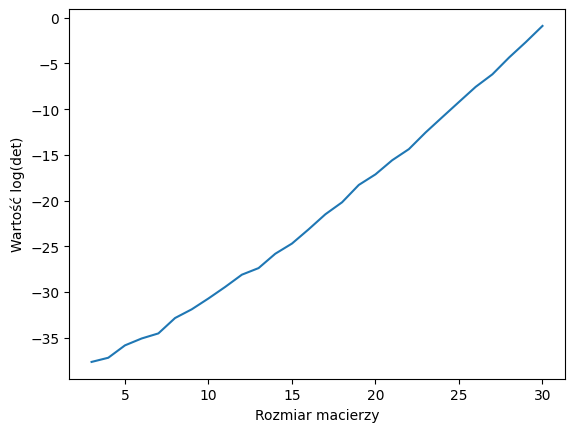

In [12]:
# WYKONAJ PONIŻSZY KOD

import matplotlib.pyplot as plt

ns = np.arange(3,31)
iters = 100
dets = np.zeros((len(ns), iters))

for ni in range (len(ns)):
    for i in range (iters):
        A = np.random.randn(ns[ni], ns[ni]) # step 1
        A[ : , 0] = A[ :, 1] # step 2
        dets[ni , i]=np.abs(np.linalg.det(A)) # step3

plt.plot(ns, np.log(np.mean(dets,axis =1)))
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Wartość log(det)');

Jak widać na powyższym rysunku wartości średnie wyznaczników rosną wraz ze wzrostem wymiaru macierzy. Błędy zaokrągleń mają ogromny wpływ na otrzymany wynik.

### 7. Zastosowanie macierzy do znajdowania rozwiązania zagadnienia regresji liniowej

Na poprzednich zajęciach zobaczyliśmy, że rozwiązywanie układów równań liniowych może być wykorzystane do rozwiązywania problemów interpolacji wielomianowej (czyli znajdowania wielomianów, których wykresy przechodzą przez z góry zadane punkty). 

Dzisiaj zamierzamy wskazać na inne zagadnienie polegające na wyznaczenie linii prostej leżącej najbliżej danych w układzie współrzędnych punktów (taką linię nazwać moglibyśmy linią trendu; tutaj mierzyć się będziemy z sytuacją nadmiarowej informacji, funkcja liniowa ma jedną zmienną niezależną, a punktów ,,interpolacji'' będzie znacznie więcej).  Chcielibyśmy przy tym, żeby błąd, czyli odległość wartości teoretycznych (wyznaczonych przez linię trendu) od wartości faktycznych był jak najmniejszy. Istnieją poważne powody do tego by błędy sumować po podniesieniu ich wcześniej do kwadratu (na przykład dlatego, że funkcja kwadratowa jest różniczkowalna lub dlatego, że podnoszenie do kwadratu można wyrażać za pomocą [iloczynu skalarnego](https://pl.wikipedia.org/wiki/Iloczyn_skalarny)).

Zacznijmy od przykładu. W poniższej tabeli zebrano zużycie paliwa oraz wagi wybranych modeli pewnych marek samochodów ([Audi](https://www.audi.pl/pl/web/pl.html), [AMC](https://en.wikipedia.org/wiki/American_Motors_Corporation), [BMW](https://www.bmw.pl/pl/index.html), [Buick](https://www.buick.com/), [Cadillac](https://www.cadillac.com/), [Chevrolet](https://www.chevrolet.pl/), [Datsun](https://pl.wikipedia.org/wiki/Datsun)). Naszym zadaniem jest wyznaczyć prostą wskazującą na zależność między wagą samochodu (w tonach) a jego zużyciem paliwa (w litrach na 100 kilometrów).
    
| Marka     | zużycie paliwa [l/km] | waga [t]   |
|-----------|-----------------------|------------|
| AMC	    | 10,69	                | 1,3185     |
| AMC	    | 13,84   	            | 1,5075     |
| AMC	    | 10,69	                | 1,188      |
| Audi      |	13,84               | 1,2735     |
| Audi      |	10,23	            | 0,9315     |
| BMW	    | 9,41                  | 1,1925     |
| Buick	    |  11,76                | 1,4625     |
| Buick	    | 15,68                 | 1,836      |
| Buick	    | 13,07	                | 1,6515     |
| Buick	    | 9,05	                | 1,0035     |
| Buick	    | 11,76	                | 1,476      |
| Buick	    | 14,7	                | 1,746      |
| Buick	    | 12,38	                | 1,53       |
| Cadillac  |    16,8       	    | 1,9485     |
| Cadillac  |	16,8	            | 1,755      |
| Cadillac  |	11,2	            | 1,9305     |
| Chevrolet |	8,11	            | 0,9495     |
| Chevrolet	| 14,7	                | 1,6605     |
| Chevrolet	| 10,69             	| 1,431      |
| Chevrolet	| 10,69	                | 1,449      |
| Chevrolet	| 9,8	                | 1,2375     |
| Chevrolet	| 12,38	                | 1,5435     |
| Datsun	| 10,23	                | 1,0665     |
| Datsun	| 6,72	                | 0,909      |   
| Datsun	| 9,8	                | 1,026      |
| Datsun	| 11,2	                | 1,2375     |



Narysujmy w układzie współrzędnych punkty, przy czym pierwszą współrzędną jest waga pojazdu, a drugą – zużycie paliwa. Jaka prosta o równaniu $y = ax + b$ dopasowana będzie w najlepszym stopniu do tych punktów?  Spróbuj wybrać – według Ciebie – najlepiej dopasowaną prostą. Możesz zmieniać wartości $a$ i $b$ na poniższym rysunku (by uruchomić rysunek trzeba będzie prawdopodobnie zainstalować pakiet ```ipywidgets```).  

In [13]:
# WYKONAJ PONIŻSZY KOD

import matplotlib.pyplot as plt
from ipywidgets import interactive

# Definicja punktów
points = np.array([
(1.3185, 10.69),
(1.5075,13.84),
(1.188,10.69),
(1.2735,13.84),
(0.9315,10.23),
(1.1925,9.41),
(1.4625,11.76),
(1.836,15.68),
(1.6515,13.07),
(1.0035,9.05),
(1.476,11.76),
(1.746,14.70),
(1.53,12.38),
(1.9485,16.80),
(1.755,16.80),
(1.9305,11.20),
(0.9495,8.11),
(1.6605,14.70),
(1.431,10.69),
(1.449,10.69),
(1.2375,9.80),
(1.5435,12.38),
(1.0665,10.23),
(0.909,6.72),
(1.026,9.80),
(1.2375,11.20),
])

# Funkcja rysująca wykres
def plot_line(a, b):
    # Rysowanie punktów
    plt.scatter(points[:, 0], points[:, 1], color='red', label='Punkty')
    
    # Zakres dla osi x
    x = np.linspace(0, 6, 100)
    
    # Obliczanie wartości y dla prostej
    y = a * x + b
        
    # Rysowanie prostej
    plt.plot(x, y, label=f'Linia trendu: y = {a}x + {b}')
    
    # Dodanie legendy
    plt.legend()
    
    # Ustawienie etykiet osi
    plt.xlabel('waga pojazdu w tonach')
    plt.ylabel('zużycie paliwa na 100 km')
    
    # Ustawienie zakresów osi
    plt.xlim(0, 3)
    plt.ylim(0, 20)
    
    # Wyświetlenie wykresu
    plt.show()

interactive_plot = interactive(plot_line, a=(-2.0, 12.0), b=(-2.0, 6.0))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(FloatSlider(value=5.0, description='a', max=12.0, min=-2.0), FloatSlider(value=2.0, desc…

Poniżej wpisz wskazane przez Ciebie wartości $a$ oraz $b$ i wykonaj kod. Otrzymasz sumę kwadratów błędów. W dalszym ciągu podamy ogólną metodę znajdowania optymalnych parametrów $a$ oraz $b$, będziesz wówczas mógł sprawdzić na ile się pomyliłaś/eś. 

In [14]:
# UZUPEŁNIJ WARTOŚCI a ORAZ b I WYKONAJ PONIŻSZY KOD

e = np.array([
    [1.3185, 10.69],
    [1.5075,13.84],
    [1.188,10.69],
    [1.2735,13.84],
    [0.9315,10.23],
    [1.1925,9.41],
    [1.4625,11.76],
    [1.836,15.68],
    [1.6515,13.07],
    [1.0035,9.05],
    [1.476,11.76],
    [1.746,14.70],
    [1.53,12.38],
    [1.9485,16.80],
    [1.755,16.80],
    [1.9305,11.20],
    [0.9495,8.11],
    [1.6605,14.70],
    [1.431,10.69],
    [1.449,10.69],
    [1.2375,9.80],
    [1.5435,12.38],
    [1.0665,10.23],
    [0.909,6.72],
    [1.026,9.80],
    [1.2375,11.20],
])
def error(a, b, e):
    n = np.shape(e)
    err = 0
    for i in range(n[0]):
        err += np.power(e[i,1] - a*e[i,0]-b,2)
    return err

a = 7.9
b = 0.8

print(f'Kwadratowy błąd wynosi: {error(a, b, e)}')

Kwadratowy błąd wynosi: 55.89689556000004


Zaprezentujemy sposób wyliczenia optymalnych współczynników $a,b$ bazujący na rozwiązaniu układu równań liniowych. Przypuśćmy, że mamy układ $n$ punktów
$$
(x_1,y_1),\quad (x_2,y_2),\dots,\quad (x_n,y_n),
$$
a naszym celem jest znalezienie takich współczynników $a,b$, że dla prostej
$$
f(x) = ax+b
$$
suma kwadratów błędów 
$$
(y_1-f(x_1))^2 + (y_2-f(x_2))^2+\dots+(y_n-f(x_n))^2
$$
jest najmniejsza.

Zauważmy, że zachodzą równania
\begin{align*}
    y_1 & = f(x_1) + (y_1-f(x_1))\\
    y_2 & = f(x_2) + (y_2-f(x_2))\\
        & \vdots\\
    y_n & = f(x_n) + (y_n-f(x_n)),
\end{align*}
przy czym wyrażenie stojące po prawej stronie w nawiasie w każdym z równań jest błędem przybliżenia realnej wartości $y_i$ przez wartość funkcji $f$. Zapiszmy ten błąd jako $e_i$ i podstawmy wzór funkcji w miejsce $f$. Wówczas układ równań przybierze postać
\begin{align*}
    y_1 & = (b+ax_1) + e_1\\
    y_2 & = (b+ax_2) + e_2\\
        & \vdots\\
    y_n & = (b+ax_n) + e_n.
\end{align*}
Przyjmijmy teraz oznaczenia
$$
Y = 
\begin{bmatrix} 
    y_1\\ 
    y_2\\ 
    \vdots\\ 
    y_n
\end{bmatrix}, \quad
X = 
\begin{bmatrix}
    1 & x_1\\
    1 & x_2\\
    \vdots & \vdots\\
    1 & x_n
\end{bmatrix},\quad
A = 
\begin{bmatrix}
    b\\ 
    a
\end{bmatrix},\quad 
E = 
\begin{bmatrix}
    e_1\\ 
    e_2\\
    \vdots\\ 
    e_n
\end{bmatrix}.
$$
Wówczas układ równań można zapisac w postaci równania macierzowego
$$
Y = XA + E.
$$
Jak znaleźć wartość elementów macierzy $A$? Niestety wyjaśnienie metody wskazania macierzy $A$ przekracza ramy tych zajęć, podamy więc wzór na obliczenie macierzy $A$. Mamy (porównaj [artykuł w Wikipedii](https://en.wikipedia.org/wiki/Linear_regression))
$$
A = (X^TX)^{-1}X^TY,
$$
przy czym $X^T$ oznacza macierz transponowaną do macierzy $X$.



##### **Zadanie 6** (1 pkt)

Uzupełnij poniższy kod tak, by znaleźć optymalne współczynniki funkcji liniowej realizującej zagadnienie regresji liniowej dla danych

$$
\begin{align*}
& (1.3185, 10.69),\  (1.5075,13.84),\  (1.188,10.69),\  (1.2735,13.84),\\
& (0.9315,10.23),\  (1.1925,9.41),\  (1.4625,11.76),\  (1.836,15.68),\\
& (1.6515,13.07),\  (1.0035,9.05),\  (1.476,11.76),\  (1.746,14.70),\\
& (1.53,12.38),\  (1.9485,16.80),\  (1.755,16.80),\  (1.9305,11.20),\\
& (0.9495,8.11),\  (1.6605,14.70),\  (1.431,10.69),\  (1.449,10.69),\\ 
& (1.2375,9.80),\  (1.5435,12.38),\  (1.0665,10.23),\  (0.909,6.72),\\
& (1.026,9.80),\ (1.2375,11.20).
\end{align*}
$$

Dane są już wczytane wcześniej w zmiennej `e`.

Spodziewany wynik:

```plaintext
Równanie prostej regresji ma postać: y = 6.7419x + 2.3750
Minimalny bład kwadratowy wynosi: 52.5749
```

In [15]:
# UMIEŚĆ SWÓJ KOD TUTAJ
# ...
X = np.array([[1, e[i,0]] for i in range(len(e))])
Y = np.array([e[i,1] for i in range(len(e))])
# ---------------------

A = np.linalg.inv(X.T @ X) @ X.T @ Y

a = A[1]
b = A[0]

print(f'Równanie prostej regresji ma postać: y = {a:.4f}x + {b:.4f}')
print(f'Minimalny bład kwadratowy wynosi: {error(a, b, e):.4f}')

Równanie prostej regresji ma postać: y = 6.7419x + 2.3750
Minimalny bład kwadratowy wynosi: 52.5749


### 8. Zastosowanie odwrotności macierzy do deszyfrowania informacji

Zaproponujemy teraz wykorzystanie macierzy do szyfrowania informacji. Umówmy się, że literom alfabetu odpowiadać będą liczby wedle następującego przyporządkowania

| **Litera alfabetu** | *spacja* | A | B | C | D | E | F | G | H | I | J | K | L | M | N | O | P | Q | R | S | T | U | V | W | X | Y | Z |
|---------------------|----------|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| **Liczba**          |     0    | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23| 24| 25| 26|




Przypuśćmy, że chcemy zaszyfrować pewną wiadomość. Dla przykładu niech będzie to tekst ,,wyznacznik macierzy''. Naszą pracę podzielimy na etapy.

1. Zapiszemy tekst w postaci ciągu liczb. Korzystając z tabeli powyżej otrzymujemy

| tekst jawny | w | y | z | n | a | c | z | n | i | k |   | m | a | c | i | e | r | z | y |
|-------------|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|ciąg liczb   | 23| 25| 26| 14| 1 | 3 | 26| 14| 9 | 11| 0 | 13| 1 | 3 | 9 | 5 | 18| 26| 25|

Wiadomością do zaszyfrowania będzie więc ciąg 

```
23 25 26 14 1 3 26 14 9 11 0 13 1 3 9 5 18 26 25
```
Faktycznie, uruchom poniższy program.

In [16]:
# WYKONAJ PONIŻSZY KOD

def sentence_to_numbers(sentence, alphabet_dict):
    sentence = sentence.upper()
    numbers = []

    for char in sentence:
        if char.isalpha():
            numbers.append(alphabet_dict[char])
        elif char.isspace():
            numbers.append(0)

    return numbers

alphabet_dict = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10,
    'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20,
    'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26
}

sentence = "wyznacznik macierzy"

result = sentence_to_numbers(sentence, alphabet_dict)

print(result)

[23, 25, 26, 14, 1, 3, 26, 14, 9, 11, 0, 13, 1, 3, 9, 5, 18, 26, 25]



2. Wybierzemy klucz, którym będzie nieosobliwa macierz kwadratowa $A$ np. stopnia trzy. Ważne z punktu wiedzenia obliczeń numerycznych jest to, żeby macierz była o elementach całkowitych i wyznaczniku równym $1$ lub $-1.$ Wówczas macierz odwrotna będzie również macierzą o elementach całkowitych i unikniemy problemów wynikających z zakrąglania elementów macierzy odwrotnej, która ma służyć do deszyfrowania wiadomości.

   Jak wyznaczyć macierz wyznaczniku równym $1$ lub $-1$?

   Należy skonstruować macierz $C$: trójkątną górną, lub trójkątną dolną lub diagonalną o elementach całkowitych i wynaczniku równym $1$ lub $-1.$ Za pomocą operacji elementarnej nie zmieniającej wyznacznika i/lub operacji elementarnej zmieniającej tylko znak wyznacznika należy przekształcić macierz $B$ macierz pełną $A,$ której wyznacznik oczywiście będzie równy $1$ lub $-1.$

   Niech
$$
    A = 
    \begin{bmatrix}
        1 & -2 & 0\\
        2 & -3 & 4\\
        1 & -1 & 3
    \end{bmatrix}.
$$

4. Ze względu na stopień macierzy $A$, podzielimy wiadomość na wektory długości trzy, uzupełniając jeśli konieczne o zera (czyli spacje) na końcu. Otrzymujemy wektory
```
[23 25 26]  [14 1 3]  [26 14 9]  [11 0 13]  [1 3 9]  [5 18 26]  [25 0 0],
```
które zapiszemy jako kolumny macierzy $B.$

In [17]:
# WYKONAJ PONIŻSZY KOD

def columned(A):
    num_rows = 3
    num_cols = len(A) // num_rows + (1 if len(A) % num_rows != 0 else 0)
    padded_result = np.zeros((num_rows, num_cols), dtype=int)

    for i, num in enumerate(A):
        row = i % num_rows
        col = i // num_rows
        padded_result[row, col] = num
    return padded_result

print("Wynik w postaci tablicy numpy:")
print(columned(result))


Wynik w postaci tablicy numpy:
[[23 14 26 11  1  5 25]
 [25  1 14  0  3 18  0]
 [26  3  9 13  9 26  0]]


4. **Szyfrogram** (czyli zaszyfrowana informacja) powstanie przez  pomnożenie macierzy $B$ z lewej strony przez macierz $A$ (**klucz**). Mamy
$$
B = 
\begin{bmatrix}
    23 & 14 & 26 & 11 & 1 & 5 & 25\\
    25 &  1 & 14 &  0 & 3 & 18 & 0\\
    26 & 3 & 9 & 13 & 9 & 26 & 0  
\end{bmatrix}.
$$
W wyniku mnożenia $AB$ otrzymujemy
$$
AB = 
\begin{bmatrix}
    -27&   12&  -2&    11&  -5&   -31&   25\\
    75&   37&   46&   74&   29&   60&   50\\
    76&   22&   39&   50&   25&   65&   25 
\end{bmatrix}
$$
Faktycznie, sprawdźmy:

In [18]:
# WYKONAJ PONIŻSZY KOD

A = np.array([
    [1,-2,0],
    [2,-3,4],
    [1,-1,3]
])

S = A @ columned(result)

print(S)

[[-27  12  -2  11  -5 -31  25]
 [ 75  37  46  74  29  60  50]
 [ 76  22  39  50  25  65  25]]



Czytając powyższą macierz kolumnami otrzymujemy szyfrogram
```
25 80 -106 18 -4  1 16 15 -24 37 28 -41 13 29 -38 21 91 -117 25 -25 25
```

5. **Deszyfrowanie** polega na pomnożeniu (z lewej strony) macierzy szyfrogramu przez odwrotność macierzy $A$. Zwróćmy uwagę na to, że ze względu fakt, że wyznacznik niekoniecznie jest liczony dokładnie (korzystamy z funkcji ```numpy.linalg.inv```), użyliśmy funkcji zaokrąglającej wynik działania na macierzach do liczb całkowitych (funkcja ```numpy.rint```).   

In [19]:
# WYKONAJ PONIŻSZY KOD

cipher_message = np.rint(np.linalg.inv(A) @ S)

def numbers_to_words(numbers, alphabet_dict):
    words = []
    for num in numbers.flatten():
        if num == 0:
            words.append(' ')
        else:
            words.append(alphabet_dict[num])
    return ''.join(words)

integer_dict = {
    1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J',
    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T',
    21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 0: ' '
}

result = numbers_to_words(cipher_message.T, integer_dict)

print("Zdeszyfrowana wiadomość:")
print(result)

Zdeszyfrowana wiadomość:
WYZNACZNIK MACIERZY  


##### **Zadanie 7** (2 pkt.)

Kluczem szyfrującym jest macierz 
$$
A = 
\begin{bmatrix}
    -5 & -6 & -59\\
    \phantom{-}1 & \phantom{-}1 & \phantom{-}12\\
    \phantom{-}2 & \phantom{-}3 & \phantom{-}22    
\end{bmatrix}
$$
Proszę podać treść szyfrogramu

```
-110 19 53 -338 65 141 -1557 316 583 -640 127 250 -5  1 2
```

zaszyfrowanego macierzą $A$. Uzupełnij poniższą funkcję `decipher()`.

In [20]:
def decipher(A, cryptogram):
    #UMIEŚĆ SWÓJ KOD TUTAJ
        
    C = columned(cryptogram[0])
    INV = np.linalg.inv(A)
    B = np.rint(INV@C)

    return numbers_to_words(B.T, integer_dict)

A = np.array([
    [-5, -6, -59],
    [ 1,  1,  12],
    [ 2,  3,  22]
])
cryptogram = np.array([[
    -110, 19, 53, -338, 65, 141, -1557, 316, 583, -640, 127, 250, -5, 1, 2
]])

print(decipher(A, cryptogram))

DO ZOBACZENIA  
